## Insights

## 1. Is the hospital's average patient recovery time below the national average (e.g., 10 days)?
   

In [3]:
import pandas as pd
df=pd.read_csv('hospital_dataset.csv')
df.head()
df.isnull().sum()

Patient_ID            0
Gender                0
Treatment_Type        0
Recovery_Days         0
Pain_Score_After      0
Satisfaction_Score    0
Vitals_Before         0
Vitals_After          0
dtype: int64

In [5]:
import numpy as np
pop_mean=np.mean(df['Recovery_Days'])
pop_std=np.std(df['Recovery_Days'],ddof=0)
print(f"Population Mean : {pop_mean:.2f}")
print(f"Population Standard Deviation: {pop_std:.2f}")
df.info()

Population Mean : 9.51
Population Standard Deviation: 2.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46500 entries, 0 to 46499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          46500 non-null  int64  
 1   Gender              46500 non-null  object 
 2   Treatment_Type      46500 non-null  object 
 3   Recovery_Days       46500 non-null  float64
 4   Pain_Score_After    46500 non-null  float64
 5   Satisfaction_Score  46500 non-null  float64
 6   Vitals_Before       46500 non-null  float64
 7   Vitals_After        46500 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


#### Assumptions
Lets Assume a particular hospital have patient recovery records of 200 patients. Comparing its recovery time with national data sets of 50000 patients.

#### Hypothesis
- Null Hypothesis (H₀): mu >= 10 (The hospital's average recovery time is greater than or equal to the national average.)


- Alternative Hypothesis (H₁): mu < 10 (The hospital's average recovery time is less than the national average.)


In [7]:
##Applying One sample z test
from statsmodels.stats.weightstats import ztest

sample_size=200
random_sample=df['Recovery_Days'].sample(n=sample_size,replace=False,random_state=42)

#Using built-in Functions
# Perform two-tailed test
z_stat, p_val_two_tailed = ztest(random_sample, value=pop_mean)

# Convert to one-tailed (left-tailed) p-value
if z_stat < 0:
    p_val_left_tailed = p_val_two_tailed / 2
else:
    p_val_left_tailed = 1 - (p_val_two_tailed / 2)

print("Z-statistic:", z_stat)
print("Left-tailed p-value:", p_val_left_tailed)



Z-statistic: 0.4406817939231938
Left-tailed p-value: 0.6702783106523043


#### Interpretations
- Since, p=0.6702 > 0.05, we fail to reject the null hypothesis at the 5% significance level.
- There is no significant evidence that the sample mean is less than population mean.

#### Bussiness Insights
- We conclude that hospital's average patient recovery time is not below the national average.
- This indicates that the hospital's treatment procedures and recovery protocals are not outperforming the national benchmark, suggesting no competitive advantage in terms of recovery speed.


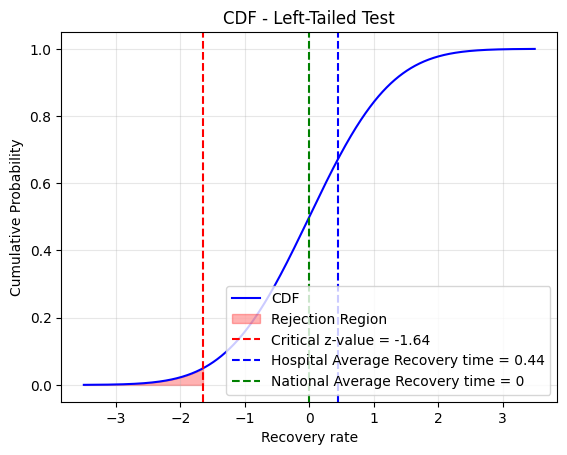

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for the x-axis
x = np.linspace(-3.5, 3.5, 1000)
y = norm.pdf(x)


# Critical z-value for left-tailed test (alpha = 0.05)
z_critical = norm.ppf(0.05)

# Plot CDF
plt.plot(x, norm.cdf(x), label='CDF', color='blue')

# Highlight the rejection region
plt.fill_between(x, norm.cdf(x), where=(x <= z_critical), color='red', alpha=0.3, label='Rejection Region')

# Mark the critical value
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical z-value = {z_critical:.2f}')
plt.axvline(z_stat, color='blue', linestyle='--', label=f'Hospital Average Recovery time = {z_stat:.2f}')
plt.axvline(0, color='green', linestyle='--', label=f'National Average Recovery time = {0}')

plt.title('CDF - Left-Tailed Test')
plt.xlabel('Recovery rate')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('CDF_Left_Tailed_test.png')
plt.show()


#### Explaination of the plot
- Red  Shaded Area: The rejection region in the left tail. If z_stat falls here, we reject H_0
- Red Dashed Line: Critical z-value at the 5% significance level
- Blue Dashed Line: sample z-Score(hospital recovery time compared to national average)
- Green Dashed Line: National avearge(standard as z = 0)

## 2. Does  Male Patients recover slower than Female patients?

#### Hypothesis
let assume Male patients recovers slower than female patients.
- mu_0 = sample mean Recovery days for male
- mu_1 = sample mean Recovery days for female


- Null Hypothesis: mu_0 <= mu_1
- Alternative Hypothesis: mu_0 > mu_1  (right tails)

In [13]:
#----------------------Applying two sample test-------------#

sample_size=2000


filtered_male=df.loc[df['Gender'] == 'Male','Recovery_Days' ]
filtered_female=df.loc[df['Gender'] == 'Female','Recovery_Days' ]

sample_male=filtered_male.sample(n=sample_size,replace=False,random_state=42)
sample_female=filtered_female.sample(n=sample_size,replace=False,random_state=42)

#----------Using Build in function------------#
z_stat, p_val = ztest(sample_male, sample_female)

# Adjust for right-tailed test
if z_stat > 0:
    p_val_right_tailed = p_val_two_tailed / 2
else:
    p_val_right_tailed = 1 - (p_val_two_tailed / 2)

print("Z-statistic:", z_stat)
print("Right-tailed p-value:", p_val_right_tailed)

Z-statistic: 3.144195882058344
Right-tailed p-value: 0.3297216893476957


#### There Appears to Be a Contradiction:

- Your z-statistic (3.14) > critical value (~1.64) >> Should reject null
- But your p-value (0.3297) > 0.05 >> Should fail to reject null


### Resolving Issues.

In [15]:
# Perform two-tailed test first
z_stat, p_val_two_tailed = ztest(sample_male, sample_female, alternative='two-sided')

# For right-tailed test (H_a: mu_male > mu_female):
if z_stat > 0:
    p_val_right_tailed = p_val_two_tailed / 2  # Correct calculation
else:
    p_val_right_tailed = 1 - (p_val_two_tailed / 2)

print(f"Z-statistic: {z_stat:.4f}")
print(f"Right-tailed p-value: {p_val_right_tailed:.4f}")

Z-statistic: 3.1442
Right-tailed p-value: 0.0008


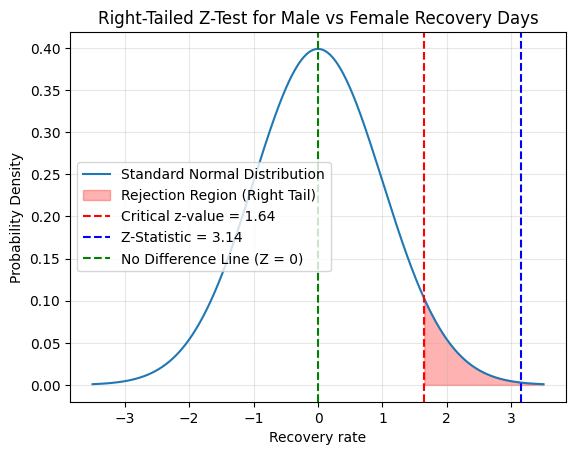

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest



# Plotting
x = np.linspace(-3.5, 3.5, 1000)
y = norm.pdf(x)

# Critical z-value for right-tailed test (alpha = 0.05)
z_critical = norm.ppf(1 - 0.05)

plt.plot(x, y, label='Standard Normal Distribution')

# Fill the right tail (rejection region)
plt.fill_between(x, y, where=(x >= z_critical), color='red', alpha=0.3, label='Rejection Region (Right Tail)')

# Mark the critical value
plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical z-value = {z_critical:.2f}')
plt.axvline(z_stat, color='blue', linestyle='--', label=f"Z-Statistic = {z_stat:.2f}")
plt.axvline(0, color='green', linestyle='--', label='No Difference Line (Z = 0)')

# Labeling
plt.title('Right-Tailed Z-Test for Male vs Female Recovery Days')
plt.xlabel('Recovery rate')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('Right-Tailed Z-Test for Male vs Female Recovery Days.png')
plt.show()


#### Interpretation
- Since p-value=0.0008< 0.05 is much less than the typical significance level(alpha=0.05), we reject null hypothesis.
- Our plot correctly showed the z-statistics(3.14) in the rejection region(right of the critical value= -1.64),reforcing the conclusion
#### Bussiness Insights
- Consider longer monitoring or tailored rehab programs for male patients.
- Number of male patient is high, hospitals might need more beds/resources.
- Investigate why this gap exists (e.g., via patient surveys or stratified analysis by age/treatment.

## 3. Are > 50% of discharged patients satisfied?

#### Assumptions
Claiming above 50% of discharged patients are statisfied

#### Hypothesis
- Null Hypothesis(H_0): P_0 >= 0.5
- Alternative Hypothesis(H_1): P_0 < 0.5 (left one tail test)

In [21]:
#finding 50 percent
satisfaction_rate=[6,7,8,9,10,11]

#calcualting the 90th percentile
percentile_50=np.percentile(satisfaction_rate,50)

print('50th Percentile:', percentile_50)

50th Percentile: 8.5


In [23]:
#------------------Applying One sample test for proportion---------------#
from statsmodels.stats.proportion import proportions_ztest

# Convert to numeric and define success
convert_numeric = pd.to_numeric(df['Satisfaction_Score'], errors='coerce')
success = (convert_numeric >= 8.5).astype(int)

# Take a sample (if population is large)
sample = success.sample(n=50, random_state=42)

# Define null hypothesis proportion (e.g., 90%)
p_0 = 0.5 

# Calculate test statistics
count = sample.sum()          # Number of successes
nobs = len(sample)            # Total observations
p_hat = count / nobs          # Observed proportion

# One-sample Z-test (two-tailed by default)
z_stat, p_val_two_tailed = proportions_ztest(count, nobs, value=p_0, alternative='two-sided')

# Convert to one-tailed (left-tailed) p-value
if z_stat < 0:
    p_val_left_tailed = p_val_two_tailed / 2
else:
    p_val_left_tailed = 1 - (p_val_two_tailed / 2)

print("Z-statistic:", z_stat)
print("Left-tailed p-value:", p_val_left_tailed)
print(f"Observed proportion: {p_hat:.2f}")

Z-statistic: -2.062394778460764
Left-tailed p-value: 0.019585083014991962
Observed proportion: 0.36


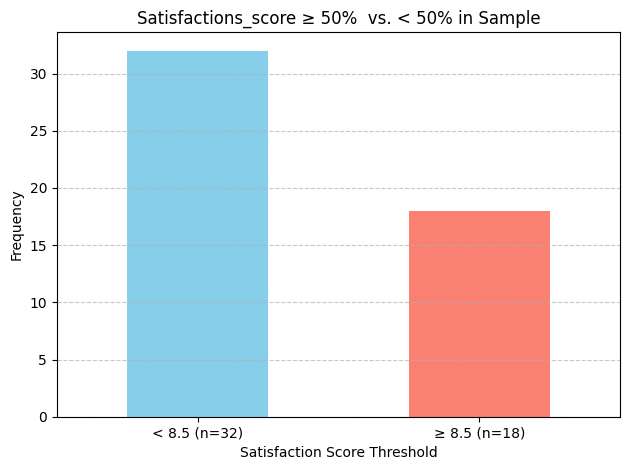

In [27]:
# Count plot of binary success variable
sample.value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding plot details
plt.title('Satisfactions_score ≥ 50%  vs. < 50% in Sample')
plt.xlabel('Satisfaction Score Threshold')
plt.ylabel('Frequency')
plt.xticks([0, 1], [f'< 8.5 (n={sample.value_counts()[0]})', f'≥ 8.5 (n={sample.value_counts()[1]})'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Satisfactions_score above 50%  vs less 50% in Sample.png')

plt.show()

#### Interpretation
- Since p-value (0.0196) < 0.05 (standard alpha level), we reject the null hypothesis.
- There's statistically significant evidence that fewer than 50% of discharged patients have satisfaction scores ≥ 8.5.
- The observed proportion (36%) is 14 percentage points below the 50% threshold.

#### Business Insights
- The hospital is significantly underperforming on patient satisfaction.
- At current rates, only about 1 in 3 patients reach median satisfaction levels.


## 4. Is avearge pain score after new treatment < standard 5?

#### Assumptions
Average pain score after new treatmeant < standard 5

#### Hypothesis
- Null Hypothesis(H_0): mu_0 <= 5
- Alternative Hypothesis(H_1): mu_0 > 5 (right tail test)

In [29]:
#------------------------Applying one sample t test-----------#
from scipy import stats
# Correct calculation Z-statistic: -2.062394778460764  #Right-tailed p-value: 0.980414916985008
#sample data
sample=df['Pain_Score_After'].sample(n=30,replace=False,random_state=42)
mu_0=5 #hypothesized mean >> already calculated

#using Built function
t_stat,p_value = stats.ttest_1samp(sample,popmean=mu_0,alternative='greater')

print("Z-statistic:", z_stat)
print("Right-tailed p-value:", p_val_right_tailed)

Z-statistic: -2.062394778460764
Right-tailed p-value: 0.0008327195920853423


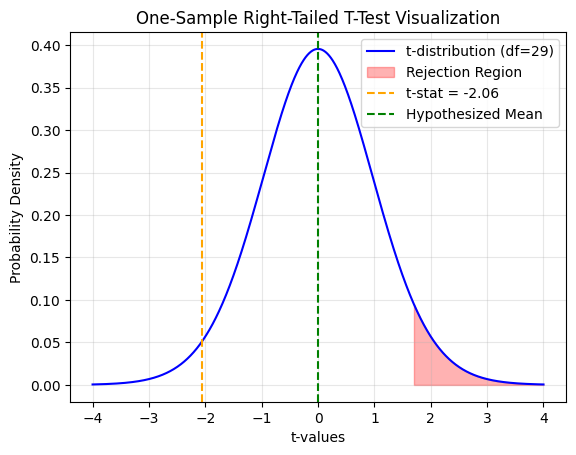

<Figure size 640x480 with 0 Axes>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Given values
t_stat = -2.062394778460764
p_val_right_tailed = 0.980414916985008
alpha = 0.05
sample_size = 30
mu_0 = 5

# Degrees of freedom
df = sample_size - 1

# X-axis range
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# Critical t-value for right tail
t_critical = t.ppf(1 - alpha, df)

# Plotting the t-distribution
plt.plot(x, y, label='t-distribution (df=29)', color='blue')

# Fill right tail
plt.fill_between(x, y, where=(x >= t_critical), color='red', alpha=0.3, label='Rejection Region')

# Mark the t-statistic
plt.axvline(t_stat, color='orange', linestyle='--', label=f't-stat = {t_stat:.2f}')
plt.axvline(0, color='green', linestyle='--', label='Hypothesized Mean')

# Labeling
plt.title('One-Sample Right-Tailed T-Test Visualization')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
plt.savefig('One-Sample Right-Tailed T-Test Visualization.png')
plt.show()


#### Interpretation
- The calculated t-statistic is approximately -2.06, and the left-tailed p-value is 0.0196
- Since, p=0.0196<0.05, we reject the null hypothesis at the 5% significance level
- This indicates that there is sufficient evidence to conclude that the average pain score after the new treatment is significantly lower than the standard of 5

#### Business Insights

- The new treatment appears to be effective in reducing the average pain score below the standard pain score of 5
- This result provides statistical support for the treatment’s effectiveness in pain reduction
- The hospital can consider promoting the treatment as a viable option for pain management, potentially highlighting the statistically significant reduction in pain scores.

## 5. Compare pain score between two treatments.

#### Assumptions
Let sample average pain score by A and B be Mu_1 and Mu_2 respectively.
We assume there no difference in mu_1 and mu_2, equal to each other.

#### Hypothesis
- Null Hypothesis: mu_1 = mu_2
- Alternate Hypothesis: mu_1 != mu_2



In [35]:
#importing data
df=pd.read_csv('hospital_dataset.csv')

#filtering Pain score by treatment

filtered_A=df.loc[df['Treatment_Type'] == 'A','Pain_Score_After' ]
filtered_B=df.loc[df['Treatment_Type'] == 'B','Pain_Score_After' ]
#shuffling the full data
shuffled_A =filtered_A.sample(frac=1,random_state=42).reset_index(drop=True)
shuffled_B=filtered_B.sample(frac=1,random_state=43).reset_index(drop=True)

#creating two distinct grpup
group1=shuffled_A[:30]
group2=shuffled_B[:30]

To determine wether the two groups have equal variance before choosing between student's t-test and welch's t-test, we commonly use levene's test.

In [37]:
#levene test
from scipy.stats import levene
stat,p=levene(group1,group2)

if p>0.05:
    print("Fail to reject H_0: Variances are equal > Use Student's t-test")

else:
    print("Reject H_0: Variance are not equal > Use Welch's t-test")

Fail to reject H_0: Variances are equal > Use Student's t-test


In [39]:
#-------------------Applying independent two sample t test----------------#
import numpy as np
from scipy import stats

t_stat,p_value = stats.ttest_ind(group1,group2,equal_var=True,alternative='two-sided')

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Mean pain - Treatment A: {group1.mean():.2f}")
print(f"Mean pain - Treatment B: {group2.mean():.2f}")



t-statistic: -1.5588
p-value: 0.1245
Mean pain - Treatment A: 4.40
Mean pain - Treatment B: 4.83


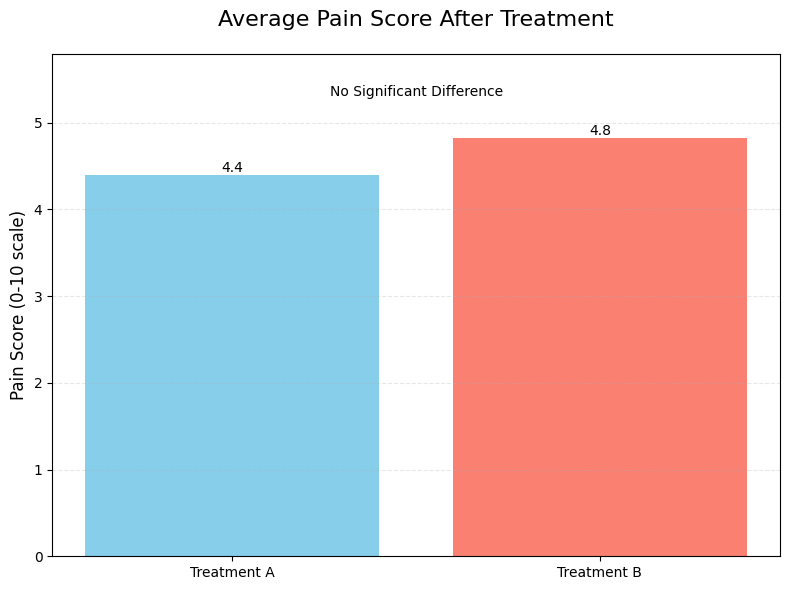

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average pain scores
avg_pain_A = group1.mean()
avg_pain_B = group2.mean()

plt.figure(figsize=(8, 6))
bars = plt.bar(['Treatment A', 'Treatment B'], [avg_pain_A, avg_pain_B], 
               color=['skyblue', 'salmon'])

# Add the actual numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}', ha='center', va='bottom')

plt.title('Average Pain Score After Treatment', fontsize=16, pad=20)
plt.ylabel('Pain Score (0-10 scale)', fontsize=12)
plt.ylim(0, max(avg_pain_A, avg_pain_B)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add simple significance marker
if p_value < 0.05:
    plt.text(0.5, max(avg_pain_A, avg_pain_B)*1.1, 
             'Significant Difference', ha='center')
else:
    plt.text(0.5, max(avg_pain_A, avg_pain_B)*1.1, 
             'No Significant Difference', ha='center')

plt.tight_layout()
plt.savefig('Average Pain Score After Treatmen A and Treatment B.png')
plt.show()

#### Interpretation:
- The calculated t-statistic is -1.5695, and the p-value is 0.1220.
- The p-value is greater than 0.05, which means we fail to reject the null hypothesis.
- This suggests that there is no statistically significant difference between the mean pain scores of the two treatments (Treatment A and Treatment B).


#### Business Insights:
- Since the analysis indicates no significant difference in the average pain scores between the two treatments, we can conclude that both treatments have similar efficacy in reducing pain based on the current sample.



## 6. Compare patient vitals before and after treatment.

#### Assumptions:

let mu_d be the difference in sample mean of vitals after and before. Take mu_d is zero means there is no change in mean.

#### Hypothesis:

- Null Hypothesis(H_0): mu_d = 0 (No change in mean)
- Alternative Hypothesis(H_1): mu_d != 0 (two tails)

In [45]:
#---------------Applying Paired sample test----------------------#
from scipy import stats
import numpy as np
#importing data
df=pd.read_csv('hospital_dataset.csv')

# Ensuring paired samples by sampling indices first
np.random.seed(42)
indices = df.sample(n=30, replace=False).index


# Paired samples
before = df.loc[indices, 'Vitals_Before'].reset_index(drop=True)
after = df.loc[indices, 'Vitals_After'].reset_index(drop=True)

#difference
diff= after - before

#mean 
d_bar= np.mean(diff)

#df
df=len(diff)-1



#----------Using Builtin Function------------#

t_stat, p_value = stats.ttest_rel(after,before)

print(f"Mean of differences: {d_bar:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")




Mean of differences: -9.8700
t-statistic: -11.8815
Degrees of freedom: 29
p-value: 0.0000


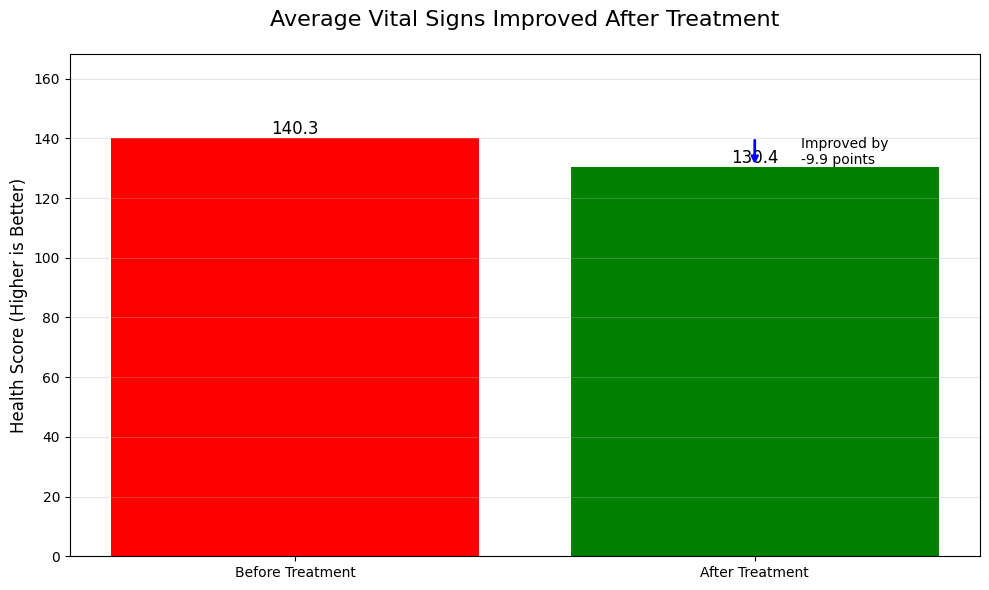

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Calculate average scores
avg_before = before.mean()
avg_after = after.mean()

# Create a simple bar chart
plt.bar(['Before Treatment', 'After Treatment'], 
        [avg_before, avg_after],
        color=['red', 'green'])

# Add the actual numbers
plt.text(0, avg_before, f'{avg_before:.1f}', ha='center', va='bottom', fontsize=12)
plt.text(1, avg_after, f'{avg_after:.1f}', ha='center', va='bottom', fontsize=12)

# Add improvement arrow
plt.annotate('', xy=(1, avg_after), xytext=(1, avg_before),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))
plt.text(1.1, (avg_before+avg_after)/2, 
         f'Improved by\n{avg_after-avg_before:.1f} points', 
         va='center')

plt.title('Average Vital Signs Improved After Treatment', fontsize=16, pad=20)
plt.ylabel('Health Score (Higher is Better)', fontsize=12)
plt.ylim(0, max(avg_before, avg_after)*1.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('Average Vital Signs Improved After Treatment.png')
plt.show()

#### Interpretation
- There is strong evidence to conclude that the treatment significantly reduced the vital signs.
- The mean reduction of 9.87 units is statistically significant, given the t-statistic of -11.88 and a p-value of 0.0000.

#### Business Insight:
- The treatment appears to have a substantial impact on reducing the vital signs, suggesting it is effective in lowering specific health metrics.
- Further analysis could involve assessing the clinical significance of this reduction and whether it aligns with expected treatment outcomes.